In [1]:
import dill
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV,ShuffleSplit
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler, Normalizer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from IPython.display import display, HTML
%matplotlib inline
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


import ModelEvaluation as me
reload(me)

<module 'ModelEvaluation' from 'ModelEvaluation.pyc'>

# 10,000 Unique Ilinks Model

In [2]:
DF = pd.read_pickle('../data/numericalFts_10kUsers_BaselineV1.pkl')

print 'Total Size of Dataset: %d' % DF.shape[0]
print 'Total Unique Users: %d\n\n' % len(DF.ILINK.unique().tolist())

Total Size of Dataset: 457465
Total Unique Users: 10000




In [3]:
X_features = ['REF_DATE_MONTH',
              'REF_DATE_DAY',
              'REF_DATE_YEAR',
              'NUM_PAST_ORDERS',
              'SUM_PAST_SHIPPED_SOLD_AMT',
              'AVG_PAST_SHIPPED_SOLD_AMT',
              'STDDEV_PAST_SHIPPED_SOLD_AMT',
              'VAR_PAST_SHIPPED_SOLD_AMT',
              'SUM_PAST_DISCOUNT',
              'AVG_PAST_DISCOUNT',
              'STDDEV_PAST_DISCOUNT',
              'VAR_PAST_DISCOUNT']
dependent = 'BOUGHT_PANTS'

print 'Input features: \n%s\n' % X_features
print 'Dependent feature: %s\n\n' % dependent

train = DF.ILINK.unique().tolist()[:8000]
test = DF.ILINK.unique().tolist()[-2000:]
DFTrain = DF[DF.ILINK.isin(train)]
DFTest = DF[DF.ILINK.isin(test)]

X_train = DFTrain[X_features]
y_train = DFTrain[dependent]

X_test = DFTest[X_features]
y_test = DFTest[dependent]

Input features: 
['REF_DATE_MONTH', 'REF_DATE_DAY', 'REF_DATE_YEAR', 'NUM_PAST_ORDERS', 'SUM_PAST_SHIPPED_SOLD_AMT', 'AVG_PAST_SHIPPED_SOLD_AMT', 'STDDEV_PAST_SHIPPED_SOLD_AMT', 'VAR_PAST_SHIPPED_SOLD_AMT', 'SUM_PAST_DISCOUNT', 'AVG_PAST_DISCOUNT', 'STDDEV_PAST_DISCOUNT', 'VAR_PAST_DISCOUNT']

Dependent feature: BOUGHT_PANTS




In [4]:
DF.head()

,ILINK,REF_DATE_MONTH,REF_DATE_DAY,REF_DATE_YEAR,MOST_RECENT_PAST_ORDER_DATE,NUM_PAST_ORDERS,SUM_PAST_SHIPPED_SOLD_AMT,AVG_PAST_SHIPPED_SOLD_AMT,STDDEV_PAST_SHIPPED_SOLD_AMT,VAR_PAST_SHIPPED_SOLD_AMT,SUM_PAST_DISCOUNT,AVG_PAST_DISCOUNT,STDDEV_PAST_DISCOUNT,VAR_PAST_DISCOUNT,BOUGHT_DRESSES,BOUGHT_KNIT TOPS,BOUGHT_OTHER,BOUGHT_PANTS,BOUGHT_WOVEN SHIRTS
0,0000000741,1.0,3.0,2018.0,2018-01-02,1,28.49,28.490000,15.304313,356.365040,21.5,21.500000,8.135072,97.480697,0,0,0,0,1
1,0000000741,1.0,4.0,2018.0,2018-01-02,1,28.49,28.490000,15.304313,356.365040,21.5,21.500000,8.135072,97.480697,0,0,0,0,1
2,0000000741,1.0,5.0,2018.0,2018-01-04,3,75.97,25.323333,2.742414,7.520833,74.0,24.666667,2.742414,7.520833,0,0,0,0,1
3,0000000741,1.0,6.0,2018.0,2018-01-04,3,75.97,25.323333,2.742414,7.520833,74.0,24.666667,2.742414,7.520833,0,0,0,0,1
4,0000000741,1.0,7.0,2018.0,2018-01-04,3,75.97,25.323333,2.742414,7.520833,74.0,24.666667,2.742414,7.520833,0,0,0,0,1


In [6]:
#random_state = 42 to insure same random split
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [7]:
grid = pd.read_pickle('../models/RFC_PantsVsAll_BaselineV1_10k.pkl')

In [8]:
y_test.value_counts()
#print (y_test == 1).count()

0    48827
1    37344
Name: BOUGHT_PANTS, dtype: int64

Validation Score Accuracy: 97.66% +/- 0.05%
Train Score Accuracy: 99.25% +/- 0.01%


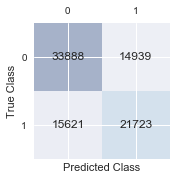

Accuracy: 0.65
Missclassification Rate: 0.35
(1) Positive Rate(Recall): 0.58
(0) Positive Rate(Sensitivity): 0.69
Precision(proportion of predicted (1)): 0.59
Specificity(proportion of predicted (0): 0.68


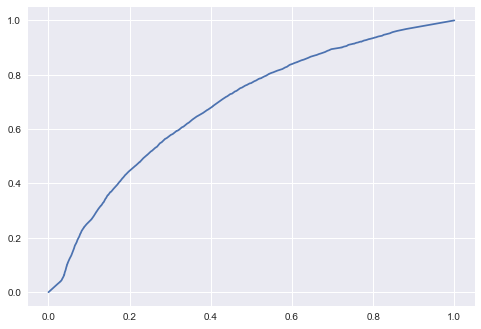

AUC(Area Under Curve) score: 0.687855


In [11]:
me.ModelEvalClassifier(grid,X_test,y_test)

In [12]:
pred = grid.predict(X_test)
y_test_0 = y_test.value_counts()[0]
y_test_1 = y_test.value_counts()[1]

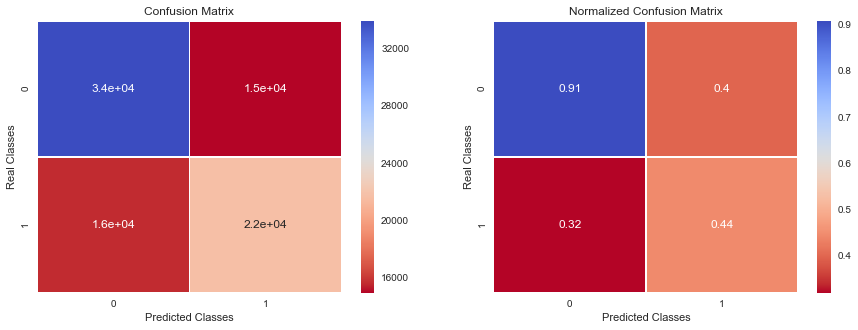

---Classification Report---
             precision    recall  f1-score   support

          0       0.68      0.69      0.69     48827
          1       0.59      0.58      0.59     37344

avg / total       0.64      0.65      0.64     86171



In [13]:
me.PlotConfusionMatrix(y_test,pred,y_test_1,y_test_0)